### Comparing S&P 500 Futures Logarithmic Returns with a Normal Distribution

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib widget

ticker = "ES=F"
dataset = yf.download(ticker)
sp500= pd.DataFrame(dataset)
sp500

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-18,1485.25,1489.75,1462.25,1467.50,1467.50,104794
2000-09-19,1467.00,1482.75,1466.75,1478.50,1478.50,103371
2000-09-20,1478.75,1480.50,1450.25,1469.50,1469.50,109667
2000-09-21,1470.25,1474.00,1455.50,1469.50,1469.50,98528
2000-09-22,1454.75,1471.00,1436.75,1468.50,1468.50,97416
...,...,...,...,...,...,...
2024-01-22,4872.50,4898.25,4872.50,4881.00,4881.00,1356050
2024-01-23,4881.75,4902.00,4874.25,4895.00,4895.00,1130749
2024-01-24,4900.25,4933.25,4889.00,4898.00,4898.00,1586824


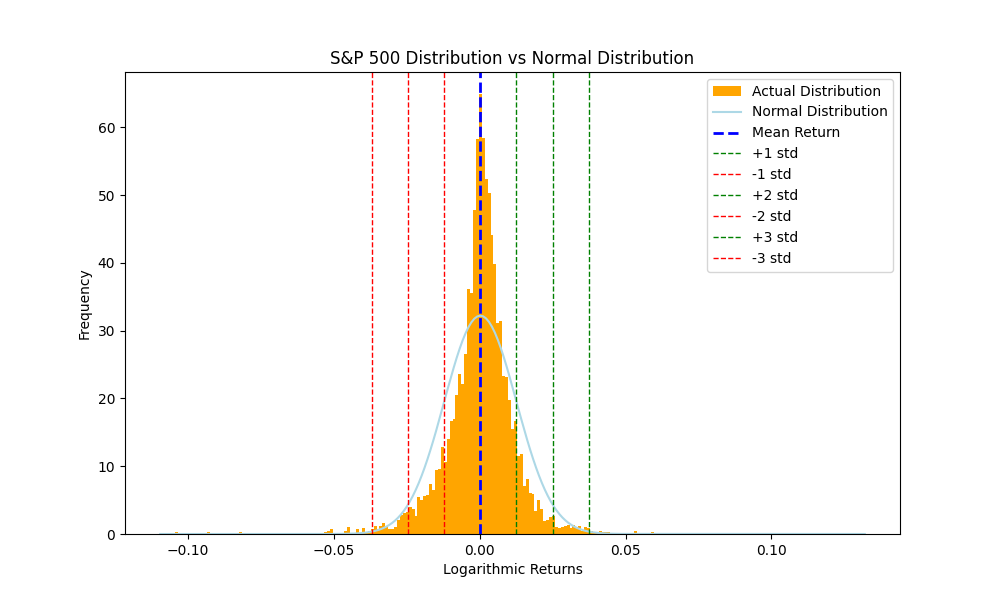

In [17]:
from scipy.stats import norm

sp500['log_return'] = np.log(sp500["Adj Close"]).diff()
mean_return = sp500.log_return.mean()
std_dev_return = sp500.log_return.std()

sp500 = sp500.dropna(subset=['log_return'])

n_bins = int((sp500.log_return.max() - sp500.log_return.min())*1000)
normal_dist = np.linspace(max(sp500.log_return), min(sp500.log_return), n_bins) # create a range of values between the minimum and maximum of the logarithmic returns

normal_curve = norm.pdf(normal_dist, mean_return, std_dev_return)

plt.figure(figsize=(10,6))
plt.title("S&P 500 Distribution vs Normal Distribution")
plt.hist(sp500.log_return, bins= n_bins, density = True, color = "orange", label = "Actual Distribution")
plt.plot(normal_dist, normal_curve, color = "lightblue", label = "Normal Distribution")
plt.xlabel("Logarithmic Returns")
plt.ylabel("Frequency")
plt.axvline(mean_return, color = "blue", linestyle = "dashed", linewidth = 2, label = "Mean Return")
for i in range(1,4):
    plt.axvline(mean_return + i * std_dev_return, color = "green", linestyle = "dashed", linewidth = 1, label = f"+{i} std" )
    plt.axvline(mean_return - i * std_dev_return, color = "red", linestyle = "dashed", linewidth = 1, label = f"-{i} std" )
plt.legend()
plt.show()


In [21]:
annualized_log_return = np.round((sp500['log_return'].mean() * 252)*100, 2)

annualized_volatility = np.round(std_dev_return * np.sqrt(252)*100, 2)

skewness = np.round(stats.skew(sp500['log_return']),2)
kurtosis = np.round(stats.kurtosis(sp500['log_return']),2)

print(f"The annualized return is: {annualized_log_return}% ")
print(f"The annualized volatility is: {annualized_volatility}% ")
print(f"The skewness is: {skewness} ")
print(f"The kurtosis is: {kurtosis} ")

The annualized return is: 5.16% 
The annualized volatility is: 19.66% 
The skewness is: -0.3 
The kurtosis is: 12.05 
